In [1]:
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = (15, 7)

# <center>521160P Johdatus Tekoälyyn<br><br>Harjoitus #2<br><br>Regressio<br>

Tässä harjoituksessa käsitellään regressiomallien sovittamista dataan ja logistista regressiota. Harjoitus tulee palauttaa **Katso harjoitukseen liittyvät palautuksen deadline moodlesta** Harjoituksesta on mahdollisuus saada 4 pistettä (2.0p + 2.0p).

Jos kohtaat ongelmia harjoitusta tehdessäsi tai sinulla on kysyttävää harjoitukseen liittyen ole yhteydessä **Moodlesta** löytyvän **ohjelmointiharjoitus 2** foorumin kautta.

**Täytä aluksi ryhmäsi jäsenten tiedot (nimi ja opiskelijanumero)**

# Ryhmän jäsenten tiedot:

* **Jäsen 1 :** ``

# Tehtävä 1. Regressiomallien sovittaminen

Tässä tehtävässä luodaan lineaarinen, polynominen ja eksponentiaalinen regressiomalli auton pysähtymismatkan ja nopeuden riippuvuuden selvittämiseksi. Tehtävässä käytetään 1920-luvulla kerättyä dataa autojen pysähtymismatkoista eri nopeuksilla. Pysähtymismatka koostuu jarrutusmatkasta ja reagointiaikaa vastaavasta matkasta. Alkuperäinen data sisältää yhteensä 50 näytettä ja kaksi muuttujaa: pysähtymismatka mittayksikössä jalka ja nopeus mittayksikössä mailia tunnissa.

Muunnetaan pysähtymismatka metreiksi ja nopeus mittayksikköön km/h ja sijoitetaan datanäytteet kuvaajaan.

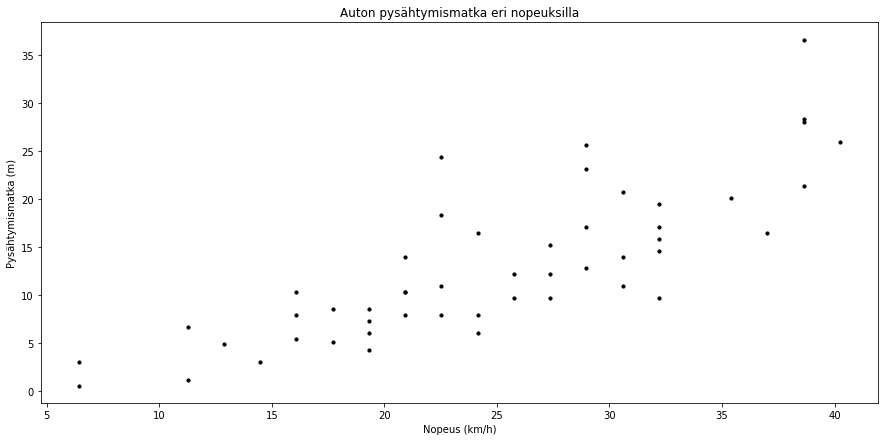

In [4]:
# Ladataan data cars numpy-listoihin. Muuttuja X viittaa nopeuden arvoihin ja muuttuja Y pysähtymismatkan arvoihin
X, Y = np.loadtxt('data/cars.txt', delimiter=',', unpack=True)
# Muunnetaan muuttujat X ja Y yksikköihin km/h ja metri
X = X*1.609344
Y = Y*0.3048
# Sijoitetaan datanäytteet kuvaajaan
plt.scatter(X, Y, color="black",s=10, marker='o')
plt.title('Auton pysähtymismatka eri nopeuksilla')
plt.xlabel('Nopeus (km/h)')
plt.ylabel('Pysähtymismatka (m)')
plt.show()

Koneoppimisessa opetusdataa käytetään mallin opettamiseen ja testidataa opetettavan mallin suorituskyvyn arvioimiseen. Tässä tapauksessa opettaminen tarkoittaa sopivien funktion parametrien selvittämistä opetusdatan näytteiden perusteella. Aluksi data jaetaan opetusdataan ja testidataan scikit-learn-kirjaston [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) funktiolla. Funktio ottaa parametreina x-akselin pisteet, y-akselin pisteet ja testidatan absoluuttisen koon. Käytetään 70% näytteistä eli 35 näytettä mallin opettamiseen ja 30% näytteistä eli 15 näytettä mallin testaamiseen.

Tehtäväsi on arvioida lineaarisen, polynomisen ja eksponentiaalisen regressiomallin suorituskykyä käyttämällä korrelaatiokertoimen neliötä ja keskineliövirhettä ja ennustaa eri malleilla auton pysähtymismatka annetusta nopeudesta.

## Lineaarinen regressiomalli

Suoritetaan lineaarisen regressiomallin opettaminen opetusdatalla. Tämä onnistuu numpy-kirjaston funktioilla [np.polyfit()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) ja [np.poly1d()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html). Sijoitetaan opetusdatan näytteet kuvaajaan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä. 

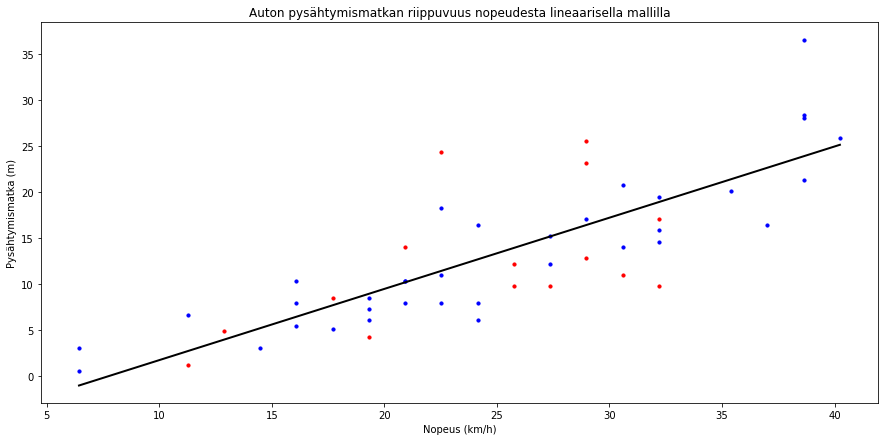

Sovitetun suoran yhtälö:  y = 0.7738 x - 5.9878


In [5]:
# Jaetaan data opetusdataan ja testidataan
X_opetus, X_testi, Y_opetus, Y_testi = train_test_split(X, Y, test_size=0.3, random_state=0)
# Sijoitetaan opetusdatan näytteet kuvaajan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä
plt.scatter(X_opetus, Y_opetus, color="blue",s=10, marker='o')
plt.scatter(X_testi, Y_testi, color="red",s=10, marker='o')
plt.title('Auton pysähtymismatkan riippuvuus nopeudesta lineaarisella mallilla')
plt.xlabel('Nopeus (km/h)')
plt.ylabel('Pysähtymismatka (m)')

# Optimoidaan suoran parametrit k ja b pienimmän neliösumman menetelmällä numpy-kirjaston polyfit funktiota käyttämällä
# Funktio ottaa parametreina x-akselin pisteet, y-akselin pisteet ja sovitettavan polynomifunktion asteluvun 
# Suora on ensimmäisen asteen polynomifunktio
suoran_parametrit = np.polyfit(X_opetus, Y_opetus, 1)
# Luodaan lineaarinen malli nympy-kirjaston poly1d funktiolla optimaalisten suoran parametrien löydyttyä
lineaarinen_malli = np.poly1d(suoran_parametrit)

# Piirretään suora kuvaajaan vaihteluvälille [min(X_opetus), max(X_opetus)]
X_suora = np.linspace(min(X_opetus), max(X_opetus))
Y_suora = lineaarinen_malli(X_suora)
plt.plot(X_suora, Y_suora, c='black', linewidth=2)
plt.show()

def etumerkki(numero):
    """
    Tässä funktiossa selvitetään yhtälön parametrien etumerkki kertoimien tulostamista varten 
    """
    if numero >= 0:
        return '+'
    return '-'

# Tulostetaan sovitetun suoran yhtälö
print('Sovitetun suoran yhtälö:  y = {} x {} {}'.format(round(suoran_parametrit[0],4), etumerkki(suoran_parametrit[1]), abs(round(suoran_parametrit[1],4))))


Arvioidaan tämän jälkeen sovitetun lineaarisen mallin suorituskykyä testidataa käyttämällä. Käytetään suorituskyvyn mittoina korrelaatiokertoimen neliötä ja keskineliövirhettä, jotka lasketaan seuraavilla yhtälöillä. 

\begin{equation}
r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = 1 - \frac{\sum\limits_{i=1}^n (Y_{i} - f(X_{i}))^2}{\sum\limits_{i=1}^n (Y_{i} - \bar{Y})^2}
\end{equation}

\begin{equation}
MSE = \frac{1}{n} \sum\limits_{i=1}^n (Y_{i} - f(X_{i}))^2
\end{equation}

Toteuta numpy-kirjaston funktioita [np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.square()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html), [np.mean()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) käyttämällä yhtälöiden suorituskyvyn mitat. Keskineliövirhettä varten tarvitset myös näytteiden lukumäärän. 

Toteutettuasi mitat, tarkasta vielä lineaariselle mallille, että saat valmiita scikit-learn kirjaston funktioita [sm.r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) ja [sm.mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) vastaavat arvot.

In [6]:
def keskineliövirhe(Y,Y_ennuste):
    """
    Tässä funktiossa lasketaan keskineliövirhe, kun tiedossa on testidatan y-akselin arvot ja ennustetut y-akselin arvot.
    """
    näytteiden_lukumäärä = Y.size
    #-------- TÄHÄN SINUN KOODI --------
    # Laske keskineliövirhe (Vihje: tarvitset numpy-kirjaston funktioita np.sum() ja np.square())
    keskineliövirhe = (np.sum(np.square(Y-Y_ennuste)))/näytteiden_lukumäärä

    # Funktio palauttaa keskineliövirheen
    return keskineliövirhe
    #-----------------------------------

def korrelaatiokertoimen_neliö(Y,Y_ennuste):
    """
    Tässä funktiossa lasketaan korrelaatiokertoimen neliö, kun tiedossa on testidatan y-akselin arvot ja ennustetut y-akselin arvot.
    """
    #-------- TÄHÄN SINUN KOODI --------
    # Laske SSE (Vihje: tarvitset numpy-kirjaston funktioita np.sum() ja np.square())
    SSE = np.sum(np.square(Y-Y_ennuste))
    
    # Laske SST (Vihje: tarvitset numpy-kirjaston funktioita np.sum(), np.square() ja np.mean())
    SST = np.sum(np.square(Y-np.mean(Y_ennuste)))
   
    # Laske korrelaatiokertoimen neliö
    R2 = 1-(np.sum(np.square(Y-Y_ennuste))/np.sum(np.square(Y-np.mean(Y_ennuste))))#1-(SSE/SST)

    # Funktio palauttaa korrelaatiokertoimen neliön
    return R2
    #-----------------------------------
    
print('Korrelaatiokertoimen neliö lineaariselle mallille scikit-learn kirjaston valmiilla funktiolla: ', sm.r2_score(Y_testi, lineaarinen_malli(X_testi)))
print('Keskineliövirhe lineaariselle mallille scikit-learn kirjaston valmiilla funktiolla: ', sm.mean_squared_error(Y_testi, lineaarinen_malli(X_testi)))
print('\nKorrelaatiokertoimen neliö lineaariselle mallille toteuttamallasi funktiolla: ', korrelaatiokertoimen_neliö(Y_testi, lineaarinen_malli(X_testi)))
print('Keskineliövirhe lineaariselle mallille toteuttamallasi funktiolla: ', keskineliövirhe(Y_testi, lineaarinen_malli(X_testi)))

Korrelaatiokertoimen neliö lineaariselle mallille scikit-learn kirjaston valmiilla funktiolla:  0.28371351685031754
Keskineliövirhe lineaariselle mallille scikit-learn kirjaston valmiilla funktiolla:  35.5191615727737

Korrelaatiokertoimen neliö lineaariselle mallille toteuttamallasi funktiolla:  0.28501676642857665
Keskineliövirhe lineaariselle mallille toteuttamallasi funktiolla:  35.5191615727737


## Polynominen regressiomalli

Suoritetaan polynomisen regressiomallin opettaminen opetusdatalla. Sijoitetaan opetusdatan näytteet kuvaajaan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä.

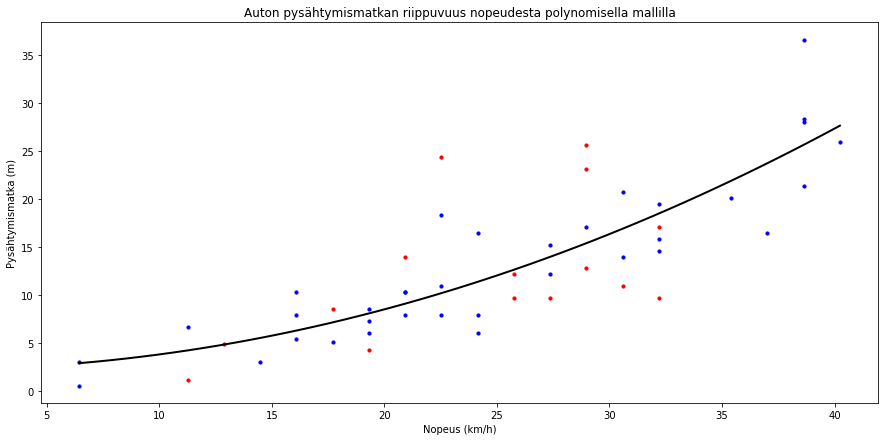

Sovitetun paraabelin yhtälö:  y = 0.0157 x^2 - 0.0029 x + 2.2965


In [7]:
# Sijoitetaan opetusdatan näytteet kuvaajan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä
plt.scatter(X_opetus, Y_opetus, color="blue",s=10, marker='o')
plt.scatter(X_testi, Y_testi, color="red",s=10, marker='o')
plt.title('Auton pysähtymismatkan riippuvuus nopeudesta polynomisella mallilla')
plt.xlabel('Nopeus (km/h)')
plt.ylabel('Pysähtymismatka (m)')

# Optimoidaan paraabelin parametrit pienimmän neliösumman menetelmällä numpy-kirjaston polyfit funktiota käyttämällä
paraabelin_parametrit = np.polyfit(X_opetus, Y_opetus, 2)
# Luodaan polynominen malli nympy-kirjaston poly1d funktiolla optimaalisten paraabelin parametrien löydyttyä
polynominen_malli = np.poly1d(paraabelin_parametrit)

# Piirretään paraabeli kuvaajaan vaihteluvälille [min(X_opetus), max(X_opetus)]
X_paraabeli = np.linspace(min(X_opetus), max(X_opetus))
Y_paraabeli = polynominen_malli(X_paraabeli)
plt.plot(X_paraabeli, Y_paraabeli, c='black', linewidth=2)
plt.show()

# Tulostetaan sovitetun paraabelin yhtälö
print('Sovitetun paraabelin yhtälö:  y = {} x^2 {} {} x {} {}'.format(round(paraabelin_parametrit[0],4), etumerkki(paraabelin_parametrit[1]), abs(round(paraabelin_parametrit[1],4)),etumerkki(paraabelin_parametrit[2]), abs(round(paraabelin_parametrit[2],4))))

Lasketaan korrelaatiokertoimen neliö ja keskineliövirhe polynomiselle mallille.

In [8]:
print('Korrelaatiokertoimen neliö polynomiselle mallille: ', korrelaatiokertoimen_neliö(Y_testi, polynominen_malli(X_testi)))
print('Keskineliövirhe polynomiselle mallille: ', keskineliövirhe(Y_testi, polynominen_malli(X_testi)))

Korrelaatiokertoimen neliö polynomiselle mallille:  0.24668356273011838
Keskineliövirhe polynomiselle mallille:  37.44923454097599


## Eksponentiaalinen regressiomalli

Suoritetaan eksponentiaalisen regressiomallin opettaminen opetusdatalla. Sijoitetaan opetusdatan näytteet kuvaajaan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä.

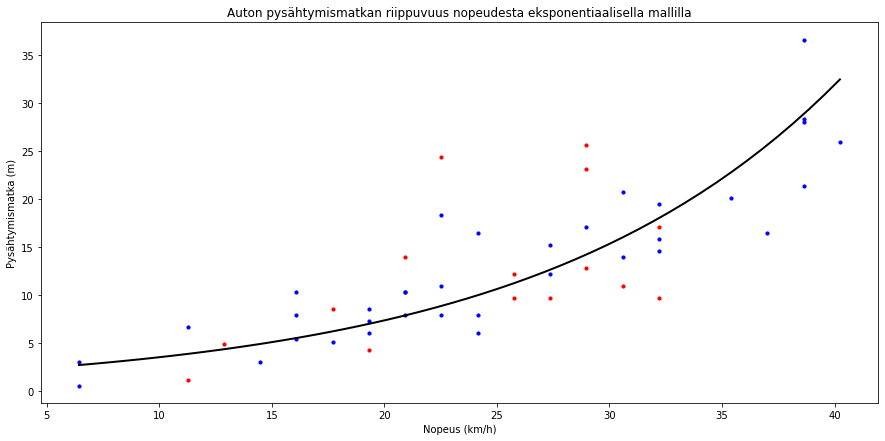

Sovitetun eksponenttifunktion yhtälö:  y = exp^(0.0732 x + 0.5354)


In [9]:
# Sijoitetaan opetusdatan näytteet kuvaajan sinisinä pisteinä ja testidatan näytteet punaisina pisteinä
plt.scatter(X_opetus, Y_opetus, color="blue",s=10, marker='o')
plt.scatter(X_testi, Y_testi, color="red",s=10, marker='o')
plt.title('Auton pysähtymismatkan riippuvuus nopeudesta eksponentiaalisella mallilla')
plt.xlabel('Nopeus (km/h)')
plt.ylabel('Pysähtymismatka (m)')

def eksponentiaalinen_malli(x):
    """
    Tässä funktiossa toteutetaan eksponentiaalinen regressiomalli
    """
    global eksponenttifunktion_parametrit
    # Optimoidaan eksponenttifunktion parametrit pienimmän neliösumman menetelmällä numpy-kirjaston polyfit funktiota käyttämällä
    # ln(y) = kx + b <=> y = exp(kx+b)
    eksponenttifunktion_parametrit = np.polyfit(X_opetus, np.log(Y_opetus), 1)
    return np.exp(eksponenttifunktion_parametrit[0]*x + eksponenttifunktion_parametrit[1])

# Piirretään eksponenttifunktio kuvaajaan vaihteluvälille [min(X_opetus), max(X_opetus)]
X_eksponenttifunktio = np.linspace(min(X_opetus), max(X_opetus))
Y_eksponenttifunktio = eksponentiaalinen_malli(X_eksponenttifunktio)
plt.plot(X_eksponenttifunktio, Y_eksponenttifunktio, c='black', linewidth=2)
plt.show()

# Tulostetaan sovitetun eksponenttifunktion yhtälö
print('Sovitetun eksponenttifunktion yhtälö:  y = exp^({} x {} {})'.format(round(eksponenttifunktion_parametrit[0],4), etumerkki(eksponenttifunktion_parametrit[1]), abs(round(eksponenttifunktion_parametrit[1],4))))

Lasketaan korrelaatiokertoimen neliö ja keskineliövirhe eksponentiaaliselle mallille.

In [10]:
print('Korrelaatiokertoimen neliö eksponentiaaliselle mallille: ', korrelaatiokertoimen_neliö(Y_testi, eksponentiaalinen_malli(X_testi)))
print('Keskineliövirhe eksponentiaaliselle mallille: ', keskineliövirhe(Y_testi, eksponentiaalinen_malli(X_testi)))

Korrelaatiokertoimen neliö eksponentiaaliselle mallille:  0.20226511412817183
Keskineliövirhe eksponentiaaliselle mallille:  41.01433294717585


**Mikä malleista toimi suorituskyvyn mittojen perusteella testidatalle parhaiten?**

`Suorituskyvyn mittojen perusteella lineaarinen regressiomalli sopii testidatalle parhaiten, sillä korrelaatiokertoimen neliö on suurin ja keskineliövirhe pienin muihin verrattuna. Mitä pienempi keskineliövirhe, sitä tarkemmat arviot keskimäärin ovat. Korrelaatiokertoimen neliö puolestaan osoittaa, että selittävä muuttuja selittää n. 28% selitettävän muuttujan varianssista.`

Ennustetaan lopuksi eri malleja käyttämällä, kuinka pitkä pysähtymismatka on, kun tiedetään että autoilija jarruttaa 80 km/h nopeudesta.

In [11]:
print('Pysähtymismatka 80 km/h nopeudesta lineaarisella mallilla ennustettuna on: ', round(lineaarinen_malli(80),2), 'metriä')
print('Pysähtymismatka 80 km/h nopeudesta polynomisella mallilla ennustettuna on: ', round(polynominen_malli(80),2), 'metriä')
print('Pysähtymismatka 80 km/h nopeudesta eksponentiaalisella mallilla ennustettuna on: ', round(eksponentiaalinen_malli(80),2), 'metriä')

Pysähtymismatka 80 km/h nopeudesta lineaarisella mallilla ennustettuna on:  55.92 metriä
Pysähtymismatka 80 km/h nopeudesta polynomisella mallilla ennustettuna on:  102.66 metriä
Pysähtymismatka 80 km/h nopeudesta eksponentiaalisella mallilla ennustettuna on:  595.04 metriä


**Liikenneturvan nettisivujen mukaan nykyaikaisen henkilöauton pysähtymismatka kuivalla tiellä 80 km/h nopeudesta on tasan 50 metriä. Tämän tiedon nojalla, mikä tai mitkä opetetuista malleista antavat realistisia ennusteita tälle testinäyteelle?**

`Lineaarinen malli antaa realistisen ennusteen testinäytteelle 55.92 metrin ennusteella.`

# Tehtävä 2. Logistinen regressio

Toisessa tehtävässä luodaan logistisen regression luokittelijoita ennustamaan pima-intiaaniheimon naisten riskiä sairastua diabetekseen. Tehtävässä käytetty data on kerätty yli 21 vuotiailta pima-intiaaniheimon naisilta mittaamalla heiltä erilaisia diabeteksen kanssa korreloivia muuttujia. Muuttujina on käytetty raskauksien lukumäärää, paastoplasman glukoosin määrää veressä, verenpainetta, ihon paksuutta, insuliinin määrää veressä, painoindeksiä, diabeteksen esiintyvyydestä suvussa laskettua kerrointa ja ikää. Datassa diabesta sairastaneita potilaita on 500 kappaletta ja terveitä potilaita 268 kappaletta.

Ladataan data ja arvioidaan datan muuttujien jakaumia diabetesta sairastavien ja terveiden potilaiden välillä laatikko-janakuvioilla ja histogrammeilla. Laatikko-janakuviossa keltainen viiva kertoo mediaanin paikan, laatikon ylä- ja alareuna ylemmän ja alemman neljänneksen mediaanista ja jana datan maksimi ja minimiarvon, jotka eivät sisällä poikkeavia havaintoja (engl. outliers). Poikkeavat havainnot on merkattu laatikko-janakuvioon ympyröillä.

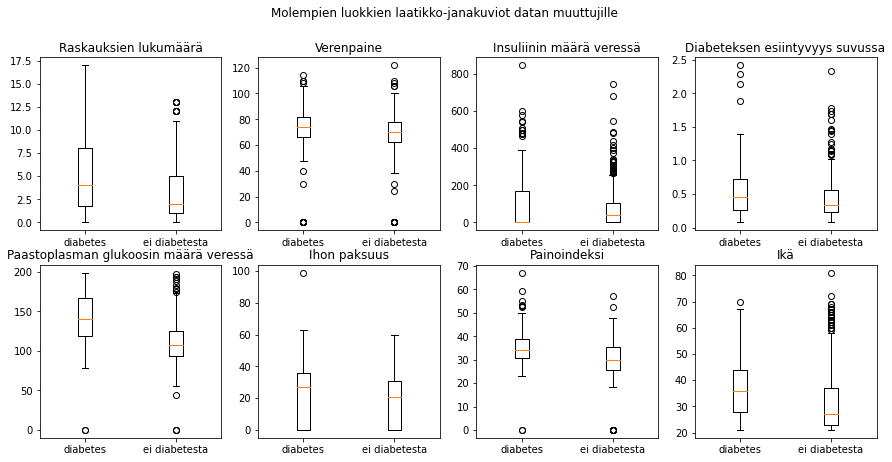

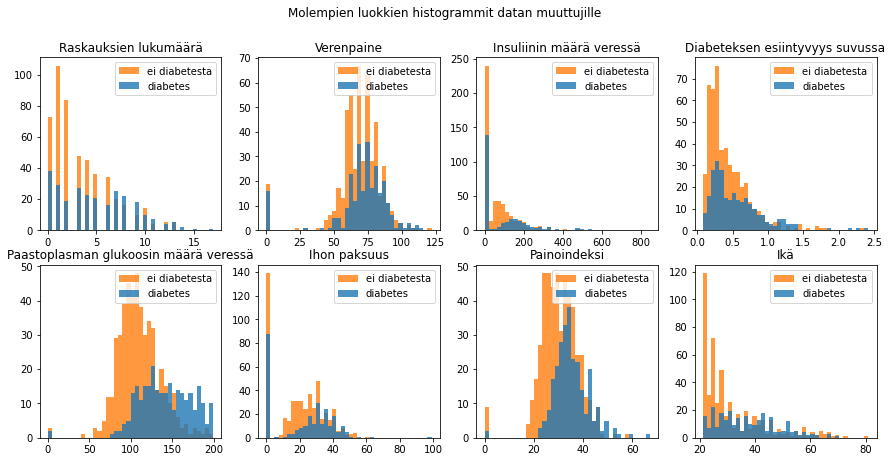

In [12]:
# Ladataan data pima-indians. Muuttuja data viittaa datan arvoihin ja muuttuja luokat datan luokkatietoihin
data = np.genfromtxt('data/pima-indians.txt', delimiter=',', usecols = (0,1,2,3,4,5,6,7))
luokat = np.genfromtxt('data/pima-indians.txt', delimiter=',', usecols = (8))

data_diabetes = data[np.where(luokat == 1)]
data_ei_diabetesta = data[np.where(luokat == 0)]

# Analysoidaan laatikko-janakuvioista, mitkä muuttujat korreloivat parhaiten luokkatiedon kanssa
otsikot = ['Raskauksien lukumäärä','Paastoplasman glukoosin määrä veressä','Verenpaine','Ihon paksuus','Insuliinin määrä veressä','Painoindeksi','Diabeteksen esiintyvyys suvussa','Ikä']
fig, ax = plt.subplots(2, 4)
for i in range(2):
    for j in range(4):
        ax[i, j].boxplot([data_diabetes[:,j*2+i], data_ei_diabetesta[:,j*2+i]], positions=[0,1])
        ax[i, j].set_title(otsikot[j*2+i])
        ax[i, j].axes.set_xticklabels(['diabetes','ei diabetesta'])
plt.suptitle('Molempien luokkien laatikko-janakuviot datan muuttujille')

fig, ax = plt.subplots(2, 4) 
for i in range(2):
    for j in range(4):
        ax[i, j].hist([data_diabetes[:,j*2+i],data_ei_diabetesta[:,j*2+i]], histtype='stepfilled', alpha=0.8, bins=40, label=['diabetes', 'ei diabetesta'])
        ax[i, j].legend(loc='upper right')
        ax[i, j].set_title(otsikot[j*2+i])
plt.suptitle('Molempien luokkien histogrammit datan muuttujille')
plt.show()

Valitaan laatikko-janakuvioiden ja histogrammien perusteella kaksi muuttujaa, jotka korreloivat parhaiten diabeteksen sairastamisen kanssa. Kaikkein selvimmin luokkien "diabetes" ja "ei diabetesta" jakaumat eroavat toisistaan muuttujalla paastoplasman glukoosin määrä veressä. Tämä nähdään esimerkiksi muuttujan laatikko-janakuviossa selvästi erillään olevina laatikkoina datan luokille. Toisen muuttujan valinnan kohdalla erot luokkien välillä eivät ole yhtä selkeitä, mutta päädytään lopulta muuttujaan painoindeksi.

Seuraavaksi suoritetaan datan jakaminen opetusdataan ja testidataan 60:40 jakosuhteella. Tämän jälkeen opetetaan logistisen regression luokittelijat valituille muuttujille erikseen ja niiden yhdistelmälle. Lopuksi vertaillaan kolmen opetetun luokittelijan luokittelutuloksia.

Opetetaan esimerkkinä logistisen regression luokittelija paastoplasman glukoosin määrälle veressä. Piirretään luotu malli ja sijoitetaan testidatan näytteet samaan kuvaajaan. Lopuksi lasketaan testidatalle luokittelutarkkuus. Luokittelutarkkuus kertoo yksinkertaisesti, kuinka monta prosenttia testidatan näytteistä luokittelija luokitteli oikeisiin luokkiin.

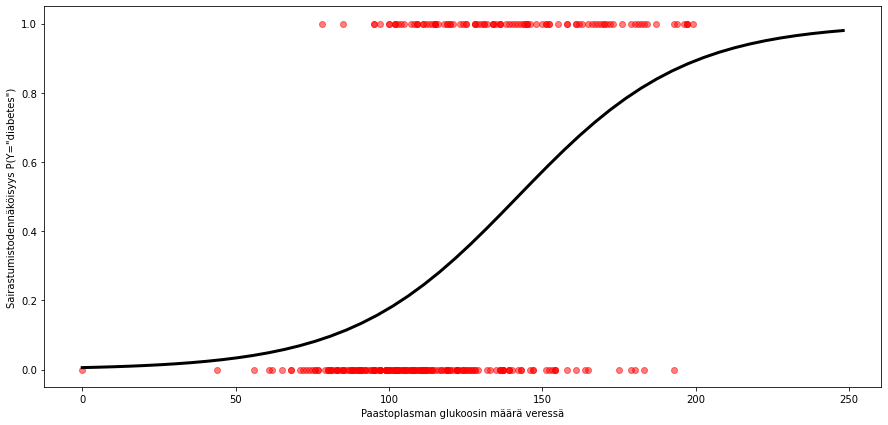

Luokittelutarkkuus paastoplasman glukoosin logistisen regression luokittelijalle on 74.68%

Logistinen funktio:  P(Y="diabetes")= 1/(1+exp^(-(0.0366 x - 5.2028)))


In [13]:
# Jaetaan data opetusdataan ja testidataan
data_opetus, data_testi, luokat_opetus, luokat_testi = train_test_split(data, luokat, test_size=0.4, random_state=0)

# Muunnetaan opetusdata paastoplasman glukoosille oikeaan formaattiin
paastoplasman_glukoosi_opetus = np.reshape(data_opetus[:,1], (-1,1))

# Muunnetaan testidata paastoplasman glukoosille oikeaan formaattiin
paastoplasman_glukoosi_testi = np.reshape(data_testi[:,1], (-1,1))

# Määritetään luokittelija
luokittelija_paastoplasman_glukoosi = LogisticRegression()

# Opetetaan logistisen regression luokittelija paastoplasman glukoosille
luokittelija_paastoplasman_glukoosi.fit(paastoplasman_glukoosi_opetus, luokat_opetus)

# Ennustetaan testidatan näytteille luokat
luokat_paastoplasman_glukoosi_ennustettu = luokittelija_paastoplasman_glukoosi.predict(paastoplasman_glukoosi_testi)

# Lasketaan luokittelutarkkuus paastoplasman glukoosin logistisen regression luokittelijalle
luokittelutarkkuus_paastoplasman_glukoosi = accuracy_score(luokat_testi, luokat_paastoplasman_glukoosi_ennustettu)

def logistinen_sigmoid_funktio(X, a, b):
    """
    Tässä funktiossa lasketaan sigmoid-funktion mukainen logistisen regression luokittelija
    """
    return 1/(1+np.exp(-(a*X+b)))

# Piirretään sovitettu funktio ja sijoitetaan testidatan näytteet samaan kuvaajaan
plt.plot(paastoplasman_glukoosi_testi, luokat_testi, 'o', c='r', alpha=0.5)
X_paastoplasman_glukoosi = np.linspace(min(paastoplasman_glukoosi_opetus), max(paastoplasman_glukoosi_opetus)+50)
Y_paastoplasman_glukoosi  = logistinen_sigmoid_funktio(X_paastoplasman_glukoosi, luokittelija_paastoplasman_glukoosi.coef_, luokittelija_paastoplasman_glukoosi.intercept_).ravel()
plt.plot(X_paastoplasman_glukoosi, Y_paastoplasman_glukoosi, color='k', linewidth=3)
plt.xlabel('Paastoplasman glukoosin määrä veressä')
plt.ylabel('Sairastumistodennäköisyys P(Y="diabetes")')
plt.show()

print('Luokittelutarkkuus paastoplasman glukoosin logistisen regression luokittelijalle on {}%'.format(round(100*luokittelutarkkuus_paastoplasman_glukoosi,2)))

def etumerkki(numero):
    """
    Tässä funktiossa selvitetään yhtälön parametrien etumerkki kertoimien tulostamista varten 
    """
    if numero >= 0:
        return '+'
    return '-'

# Tulostetaan logistisen regression luokittelijan logistinen yhtälö paastoplasman glukoosille
print('\nLogistinen funktio:  P(Y="diabetes")= 1/(1+exp^(-({} x {} {})))'.format(round(luokittelija_paastoplasman_glukoosi.coef_[0][0],4), etumerkki(luokittelija_paastoplasman_glukoosi.intercept_[0]), abs(round(luokittelija_paastoplasman_glukoosi.intercept_[0],4))))

Opeta samaan tapaan logistisen regression luokittelija painoindeksille, ennusta sillä testidatan näytteille luokat ja laske luokittelutarkkuus.

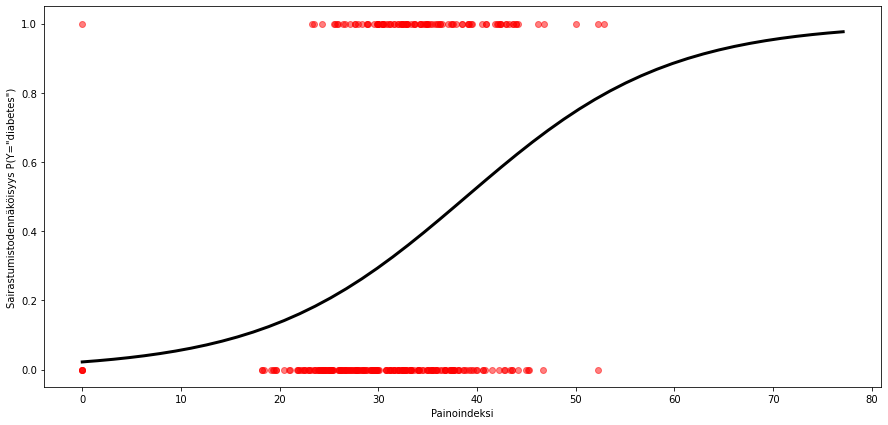

Luokittelutarkkuus painoindeksin logistisen regression luokittelijalle on 68.51%

Logistinen funktio:  P(Y="diabetes")= 1/(1+exp^(-(0.0976 x - 3.7987)))


In [14]:
# Muunnetaan opetusdata painoindeksille oikeaan formaattiin
painoindeksi_opetus = np.reshape(data_opetus[:,5], (-1,1))

# Muunnetaan testidata painoindeksille oikeaan formaattiin
painoindeksi_testi = np.reshape(data_testi[:,5], (-1,1))

# Määritetään luokittelija
luokittelija_painoindeksi = LogisticRegression()

#-------- TÄHÄN SINUN KOODI --------
# Opeta logistisen regression luokittelija painoindeksille (Vihje: .fit(opetusdata, opetusdatan luokat))
luokittelija_painoindeksi.fit(painoindeksi_opetus, luokat_opetus)
# Ennusta luokittelijalla testidatan näytteille luokat (Vihje: .predict(testidata))
luokat_painoindeksi_ennustettu = luokittelija_painoindeksi.predict(painoindeksi_testi)
# Laske luokittelutarkkuus painoindeksin logistisen regression luokittelijalle (Vihje: accuracy_score(testidatan luokat, ennustetut luokat))
luokittelutarkkuus_painoindeksi = accuracy_score(luokat_testi, luokat_painoindeksi_ennustettu)
#-----------------------------------

# Piirretään sovitettu funktio ja sijoitetaan testidatan näytteet samaan kuvaajaan
plt.plot(painoindeksi_testi, luokat_testi, 'o', c='r', alpha=0.5)
X_painoindeksi = np.linspace(min(painoindeksi_opetus), max(painoindeksi_opetus)+10)
Y_painoindeksi = logistinen_sigmoid_funktio(X_painoindeksi, luokittelija_painoindeksi.coef_, luokittelija_painoindeksi.intercept_).ravel()
plt.plot(X_painoindeksi, Y_painoindeksi, color='k', linewidth=3)
plt.xlabel('Painoindeksi')
plt.ylabel('Sairastumistodennäköisyys P(Y="diabetes")')
plt.show()

print('Luokittelutarkkuus painoindeksin logistisen regression luokittelijalle on {}%'.format(round(100*luokittelutarkkuus_painoindeksi,2)))
# Tulostetaan logistisen regression luokittelijan logistinen yhtälö painoindeksille
print('\nLogistinen funktio:  P(Y="diabetes")= 1/(1+exp^(-({} x {} {})))'.format(round(luokittelija_painoindeksi.coef_[0][0],4), etumerkki(luokittelija_painoindeksi.intercept_[0]), abs(round(luokittelija_painoindeksi.intercept_[0],4))))

Lopuksi opeta kahden muuttujan (paastoplasman glukoosin määrä veressä ja painoindeksi) logistisen regression luokittelija, ennusta sillä testidatan näytteille luokat ja laske luokittelutarkkuus. Yhdistetään opetusdataan ja testidataan molemmat muuttujat.

In [15]:
# Yhdistetään opetusdataan molemmat muuttujat
yhdistetty_opetus = np.concatenate((paastoplasman_glukoosi_opetus, painoindeksi_opetus), axis=1)

# Yhdistetään testidataan molemmat muuttujat
yhdistetty_testi = np.concatenate((paastoplasman_glukoosi_testi, painoindeksi_testi), axis=1)

# Määritetään luokittelija
luokittelija_yhdistetty = LogisticRegression()

#-------- TÄHÄN SINUN KOODI --------
# Opeta kahden muuttujan logistisen regression luokittelija (Vihje: .fit(opetusdata, opetusdatan luokat))
luokittelija_yhdistetty.fit(yhdistetty_opetus, luokat_opetus)
# Ennusta luokittelijalla testidatan näytteille luokat (Vihje: .predict(testidata))
luokat_yhdistetty_ennustettu = luokittelija_yhdistetty.predict(yhdistetty_testi)
# Laske luokittelutarkkuus kahden muuttujan logistisen regression luokittelijalle (Vihje: accuracy_score(testidatan luokat, ennustetut luokat))
luokittelutarkkuus_yhdistetty = accuracy_score(luokat_testi, luokat_yhdistetty_ennustettu)
#-----------------------------------

print('Luokittelutarkkuus kahden muuttujan logistisen regression luokittelijalle on {}%'.format(round(100*luokittelutarkkuus_yhdistetty,2)))
# Tulostetaan logistisen regression luokittelijan logistinen yhtälö kahdelle muuttujalle
print('\nLogistinen yhtälö:  P(Y="diabetes")= 1/(1+exp^(-({} x1 {} {} x2 {} {})))'.format(round(luokittelija_yhdistetty.coef_[0][0],4), etumerkki(luokittelija_yhdistetty.coef_[0][1]), abs(round(luokittelija_yhdistetty.coef_[0][1],4)), etumerkki(luokittelija_yhdistetty.intercept_[0]), abs(round(luokittelija_yhdistetty.intercept_[0],4))))

Luokittelutarkkuus kahden muuttujan logistisen regression luokittelijalle on 76.62%

Logistinen yhtälö:  P(Y="diabetes")= 1/(1+exp^(-(0.0335 x1 + 0.0777 x2 - 7.3692)))


**Mikä opetetuista luokittelijoista toimi parhaiten luokittelutarkkuuden perusteella?**

`Opetetuista luokittelijoista yhdistetty luokittelija toimii parhaiten 76.62% tarkkuudella verrattuna paastoplasman glukoosin 74.68% ja painoindeksin 68.51% logistisen regression luokittelutarkkuuteen.`

Visualisoidaan kaksidimensioinen testidata ja kahden muuttujan luokittelijan luokkaraja kaksiulotteiseen koordinaatistoon.

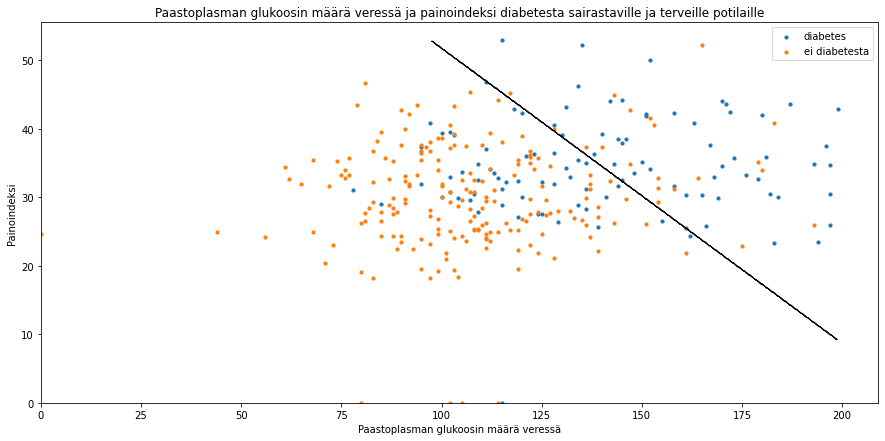

In [16]:
# Sijoitetaan testidatan näytteet kuvaajaan diabetesta sairastaville ja terveille potilaille
plt.scatter(yhdistetty_testi[np.where(luokat_testi==1), 0], yhdistetty_testi[np.where(luokat_testi==1), 1], s=10, label='diabetes')
plt.scatter(yhdistetty_testi[np.where(luokat_testi==0), 0], yhdistetty_testi[np.where(luokat_testi==0), 1], s=10, label='ei diabetesta')
plt.title('Paastoplasman glukoosin määrä veressä ja painoindeksi diabetesta sairastaville ja terveille potilaille')
plt.xlabel('Paastoplasman glukoosin määrä veressä')
plt.ylabel('Painoindeksi')
plt.legend()

def piirrä_luokittelijan_luokkaraja(luokittelija, X):
    """
    Tässä funktiossa piirretään luokittelijan luokkaraja kaksiulotteiseen kuvaajaan
    """
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.1))
    Z = luokittelija.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)

piirrä_luokittelijan_luokkaraja(luokittelija_yhdistetty, yhdistetty_testi)
plt.show()

Kun vastaanotolle tulevan pima-intiaani heimoon kuuluvan naisen painoindeksi on 25 ja paastoplasman glukoosin määrä veressä 180 mg/dL, mikä on todennäköisyys, että potilas sairastaa diabetesta? Käytä kahden muuttujan logistisen regression luokittelijan luokittelija_yhdistetty.[predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) toimintoa luokkien posterioritodennäköisyyksien ennustamiseksi.

In [17]:
potilaan_tiedot = [[180,25]]
#-------- TÄHÄN SINUN KOODI --------
posterioritodennäköisyydet = luokittelija_yhdistetty.predict_proba(potilaan_tiedot)
#-----------------------------------
print('Potilas sairastaa {} % posterioritodennäköisyydellä diabetesta'.format(round(100*posterioritodennäköisyydet[0][1],2)))

Potilas sairastaa 64.51 % posterioritodennäköisyydellä diabetesta


# Palaute
Lopuksi vastaa seuraaviin kysymyksiin:

**Kuinka paljon aikaa käytit harjoituksen tekemiseen?**

`Noin kaksi tuntia.`

**Kohtasitko ongelmia tai haasteita harjoitusta tehdessäsi? Oliko notebookissa riittävän kattava ohjeistus harjoituksen tekemiseen?**

`Ei ongelmia, ohjeistus on kattava.`

**Muuta palautetta harjoitukseen liittyen?**

`-`

# Palautus

1. Ennen kuin palautat tämän notebookin, **tarkista, että notebookin koodi toimii** ja tuottaa kaikki pyydetyt tulokset valitsemalla valikosta `Kernel -> Restart & Run All`! Tarkista lisäksi, että olet vastannut kaikkiin lihavoituihin **kysymyksiin.**
2. Tyhjennä kaikki tulosteet ja muuttujat valitsemalla valikosta `Kernel -> Restart & Clear Output`. Tämä välivaihe pienentää palautettavan notebookin kokoa merkittävästi! 
3. Nimeä uudelleen tämä notebook-tiedosto muodossa **`JT_H1_[opiskelijanumero(t)].ipynb`** (esim. `JT_H1_1234567.ipynb` jos teet harjoituksen yksin tai `JT_H1_1234567_2345678_3456789.ipynb` jos teette harjoituksen ryhmässä)
4. Palauta **ainoastaan** ratkaisemasi notebook-tiedosto (`.ipynb` päätteinen tiedosto) Moodleen ohjelmointi harjoitus 2 . **Älä siis sisällytä työkansiota tai muita tiedostoja** palautukseesi! **HOX jokainen palauttaa tiedoston itsenäisesti moodleen**
5. Vastaa **Moodlessa ohjelmointiharjoitus 2** vastaaviin kysymyksiin henkilökohtaisesti